<a href="https://colab.research.google.com/github/CatherineZYH/deep_learning/blob/assignment-1/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [35]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100


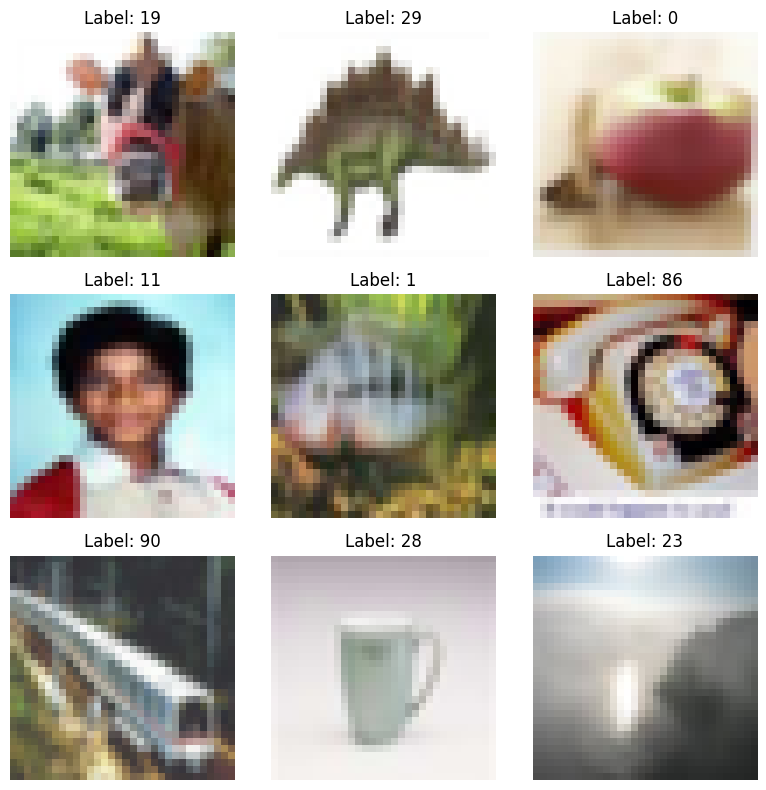

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data exploration
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Number of classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Visualize a few examples from the training set
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {y_train[i][0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [37]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Split the training data into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 100)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Add convolutional layers, followed by max pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> choose categorical_crossentropy, since we deal with a multi-class classification problem, and calculate the difference between the predicted probability distribution and the true distribution (one-hot encoded labels).
- <b>Optimizer:</b> choose Adam because it adapts the learning rate for each parameter and is generally a good choice for a wide range of deep learning models.

In [39]:
from keras import optimizers
# Compile the model
model.compile(
    loss='categorical_crossentropy',    # Loss function
    optimizer='Adam',                   # Optimizer
    metrics=['accuracy']                # Metric to track during training
    )

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [40]:
# Train the model
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val, y_val))

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0518 - loss: 4.2466 - val_accuracy: 0.1468 - val_loss: 3.6184
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1892 - loss: 3.3441 - val_accuracy: 0.2308 - val_loss: 3.1479
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2667 - loss: 2.9695 - val_accuracy: 0.2886 - val_loss: 2.8817
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3106 - loss: 2.7186 - val_accuracy: 0.3128 - val_loss: 2.7338
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3483 - loss: 2.5452 - val_accuracy: 0.3139 - val_loss: 2.7234
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3786 - loss: 2.3814 - val_accuracy: 0.3429 - val_loss: 2.6461
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4087 - loss: 2.2677 - val_accuracy: 0.3389 - val_loss: 2.6399
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4375 - loss: 2.1360 - 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

Answer:
Accuracy: this model has a training accuracy of 73.25% and a validation accuracy of 33.5% after 30 epochs.
Other metric:F1 Score
Reason for selection:The F1 score provides a balance between precision (the accuracy of the positive predictions) and recall (the ability to find all positive instances). It is  useful where the class distribution is imbalanced or when both false positives and false negatives need to be minimized.
Value of metric: see below calculations.
Interpretation of metric value: The F1 score of 0.337 suggests that the model has a moderate balance between precision and recall. This value indicates that the model may not be adequately capturing all relevant features across all classes, and there is significant room for improvement in both precision and recall.

In [41]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Get the model's predicted classes for the test set
y_pred_classes = np.argmax(model.predict(x_test), axis=-1)
y_true_classes = np.argmax(y_test, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Calculate the F1 score (macro)
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

# Report the metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.3376
F1 Score: 0.3370493735832092


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

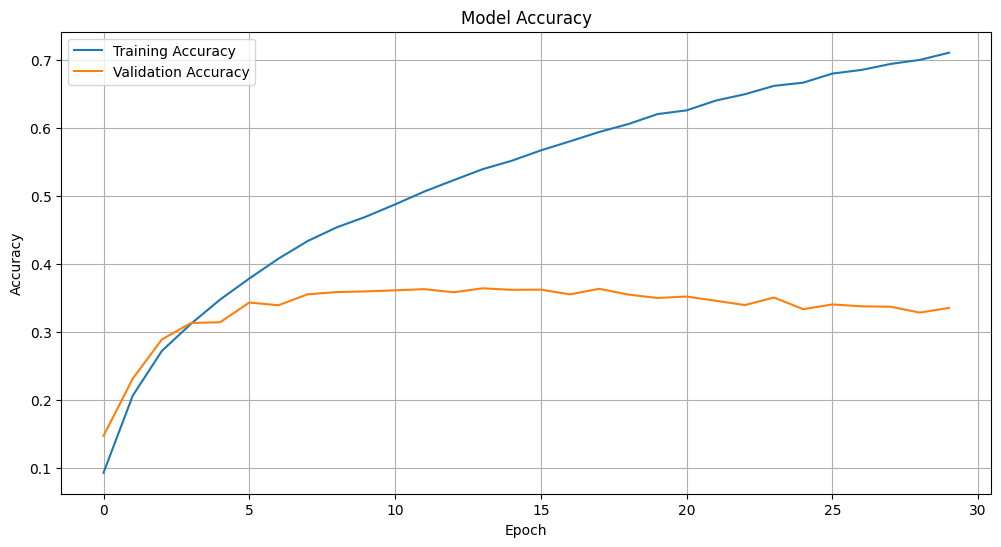

In [42]:
import matplotlib.pyplot as plt
# Assuming 'history' contains the training history
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Correctly Classified Image:


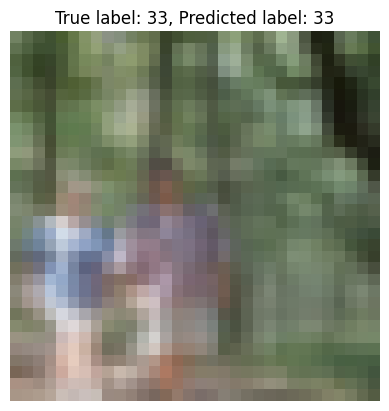

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


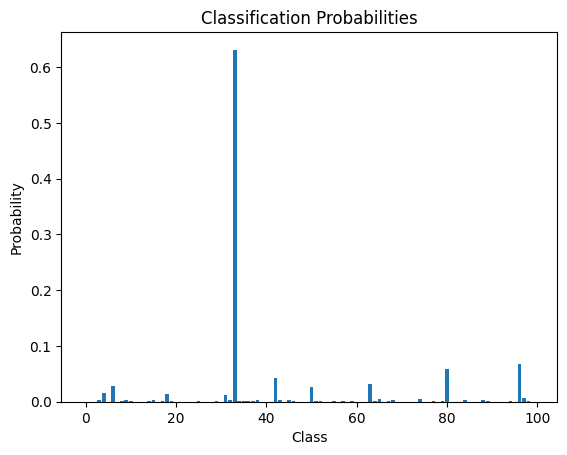

Incorrectly Classified Image:


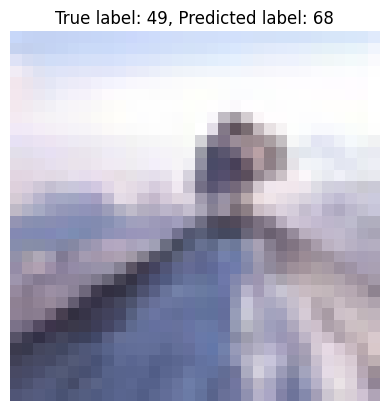

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


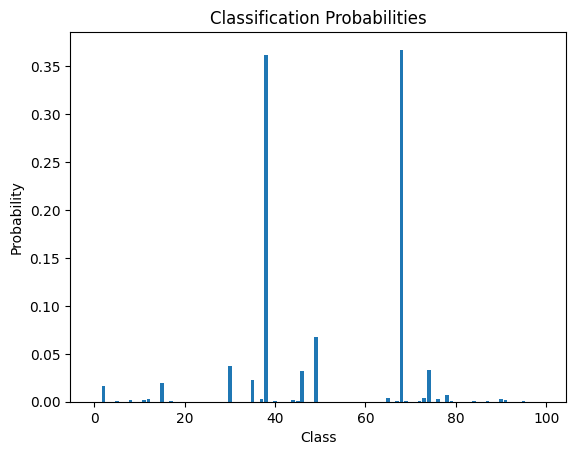

In [43]:
# Find correctly and incorrectly classified indices
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect example
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

# Display the images and the model's probabilities
def plot_image_with_probabilities(index):
    plt.imshow(x_test[index])
    plt.title(f"True label: {y_true_classes[index]}, Predicted label: {y_pred_classes[index]}")
    plt.axis('off')
    plt.show()

    # Get the model's predicted probabilities
    predicted_probabilities = model.predict(x_test[index:index+1])[0]

    # Plot the predicted probabilities
    plt.bar(range(100), predicted_probabilities)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Classification Probabilities')
    plt.show()

print("Correctly Classified Image:")
plot_image_with_probabilities(correct_index)

print("Incorrectly Classified Image:")
plot_image_with_probabilities(incorrect_index)

Correct Probability shows the model recongize the true class with strong confidence. Incorrect Probability means the model shows a relatively high probability for an incorrect class, which is close to the true class probability.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

I want to use ResNet50 because it has 50 layers, allowing it to capture complex patterns and features and also prevent the vanishing gradient problem, enabling the network to learn effectively even with many layers.
It Leverages the pre-trained weights on ImageNet, and can effectively transfer learned features to the CIFAR-100 task, especially for the database involving object recognition.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [58]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(100, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    )


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.1760 - loss: 3.5643 - val_accuracy: 0.2950 - val_loss: 2.8533
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3219 - loss: 2.6840 - val_accuracy: 0.3211 - val_loss: 2.7085
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3597 - loss: 2.4925 - val_accuracy: 0.3370 - val_loss: 2.6383
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3919 - loss: 2.3297 - val_accuracy: 0.3490 - val_loss: 2.5985
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4277 - loss: 2.1791 - val_accuracy: 0.3422 - val_loss: 2.6148
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4540 - loss: 2.0700 - val_accuracy: 0.3584 - val_loss: 2.5792
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4787 - loss: 1.9525 - val_accuracy: 0.3539 - val_loss: 2.6157
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5034 - loss: 

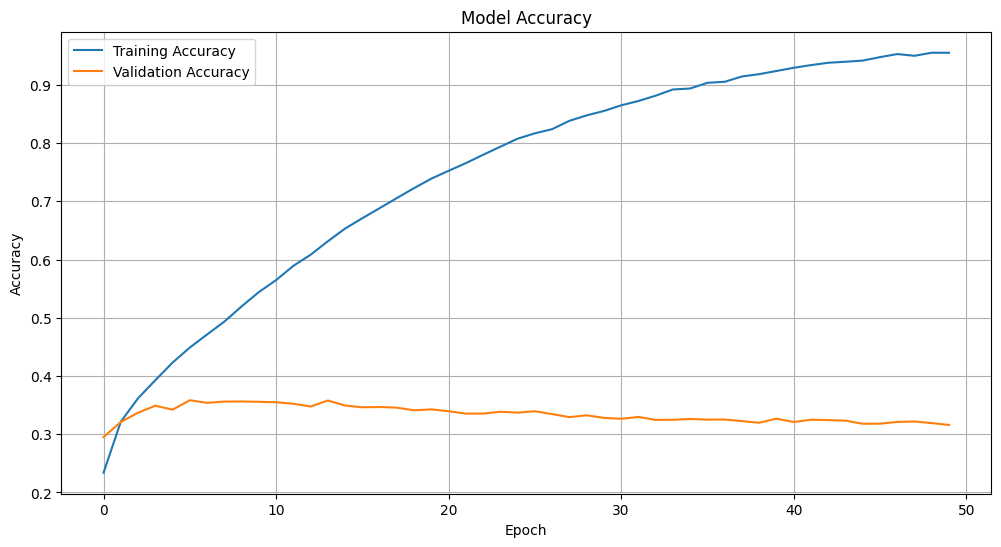

Correctly Classified Image:


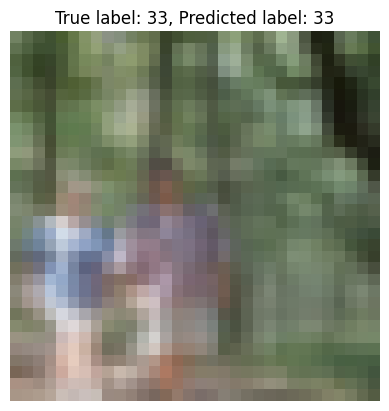

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


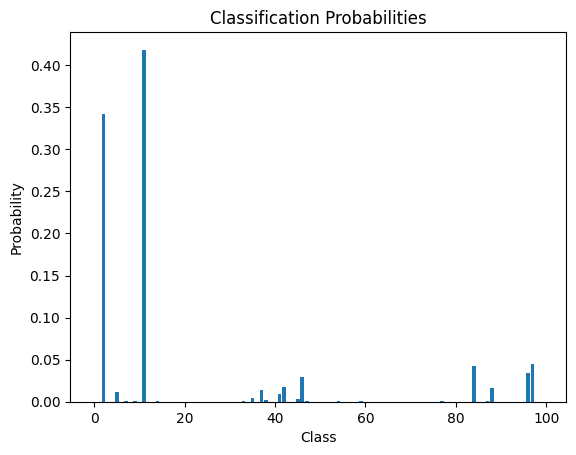

Incorrectly Classified Image:


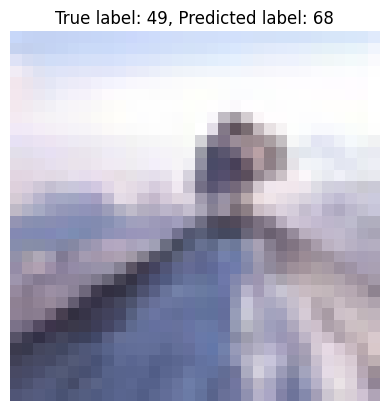

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


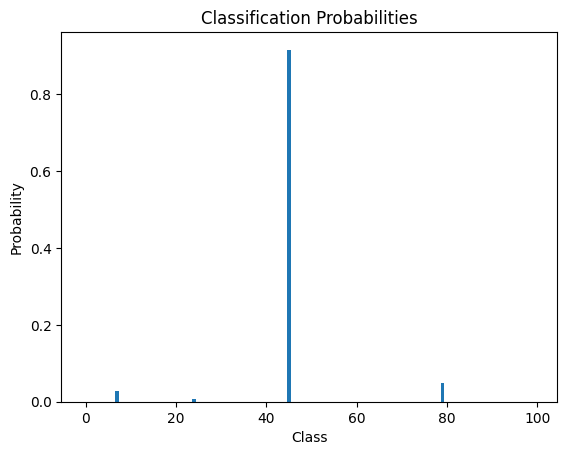

In [59]:
import matplotlib.pyplot as plt
# Assuming 'history' contains the training history
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Display the images and the model's probabilities
def plot_image_with_probabilities(index):
    plt.imshow(x_test[index])
    plt.title(f"True label: {y_true_classes[index]}, Predicted label: {y_pred_classes[index]}")
    plt.axis('off')
    plt.show()

    # Get the model's predicted probabilities
    predicted_probabilities = model.predict(x_test[index:index+1])[0]

    # Plot the predicted probabilities
    plt.bar(range(100), predicted_probabilities)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Classification Probabilities')
    plt.show()

print("Correctly Classified Image:")
plot_image_with_probabilities(correct_index)

print("Incorrectly Classified Image:")
plot_image_with_probabilities(incorrect_index)

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Answer: The training accuracy improved significantly, increasing from 73.25% to 96.38%. The training loss also decreased notably, from 0.8795 to 0.1451. However, the validation accuracy decreased slightly from 33.50% to 31.60%, while the validation loss increased from 4.0124 to 6.3466, which means the overfitting. The model likely learned the training data too well, including noise and details specific to the training set, which did not generalize to the validation data.Yes, there is room for further improvement, I think that apply dropout, L2 regularization, or batch normalization to prevent overfitting and stabilize training.